<a href="https://colab.research.google.com/github/tejas-shanthraj/srh-da3-deep-learning/blob/main/03_FashionMNIST_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge: Get the best results on the [fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset!

> "Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits."

<img src="https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png">


TASK - Challenge: Get the best results on the fashionMNIST dataset!

The challenge of this task is to get the best results on the fashionMNIST dataset by tuning hyperparameters of the model and observing convergence behavior.

"Best" - for simplicity - means the highest accuracy on the validation set.

"Rules":

    You can change any hyperparameters,
    including the number of layers,
    width of the layers,
    activation functions,
    regularizers (and their parameters),
    optimizer (and it's parameters), but
    you should not change the model architecture, use only fully connected layers! (Even if you know any others... :-P

Added constraint: The model with the "best performance" has to be saved, so it should not be just a printout happening once during training!

And: You may NOT manipulate the validation set! :-P

Happy coding! :-)


# Loading the data

In [1]:
import tensorflow as tf

(train_images, train_labels), (valid_test_images, valid_test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# because of some limitations of Keras's softmax implementation, it's
# advisable to normalise the images by dividing the intensities by the
# maximal 255 value
train_images = train_images / 255.

valid_test_images = valid_test_images / 255. # the same normalization for valid and test

valid_images = valid_test_images[:5000]
valid_labels = valid_test_labels[:5000]
test_images = valid_test_images[5000:]
test_labels = valid_test_labels[5000:]

print(train_images.shape, valid_images.shape, test_images.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (5000, 28, 28) (5000, 28, 28)


The classes are:
0.   T-shirt/top
1.   Trouser
2.	Pullover
3.	Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9.	Ankle boot

In [2]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's have a look at the first few training images:

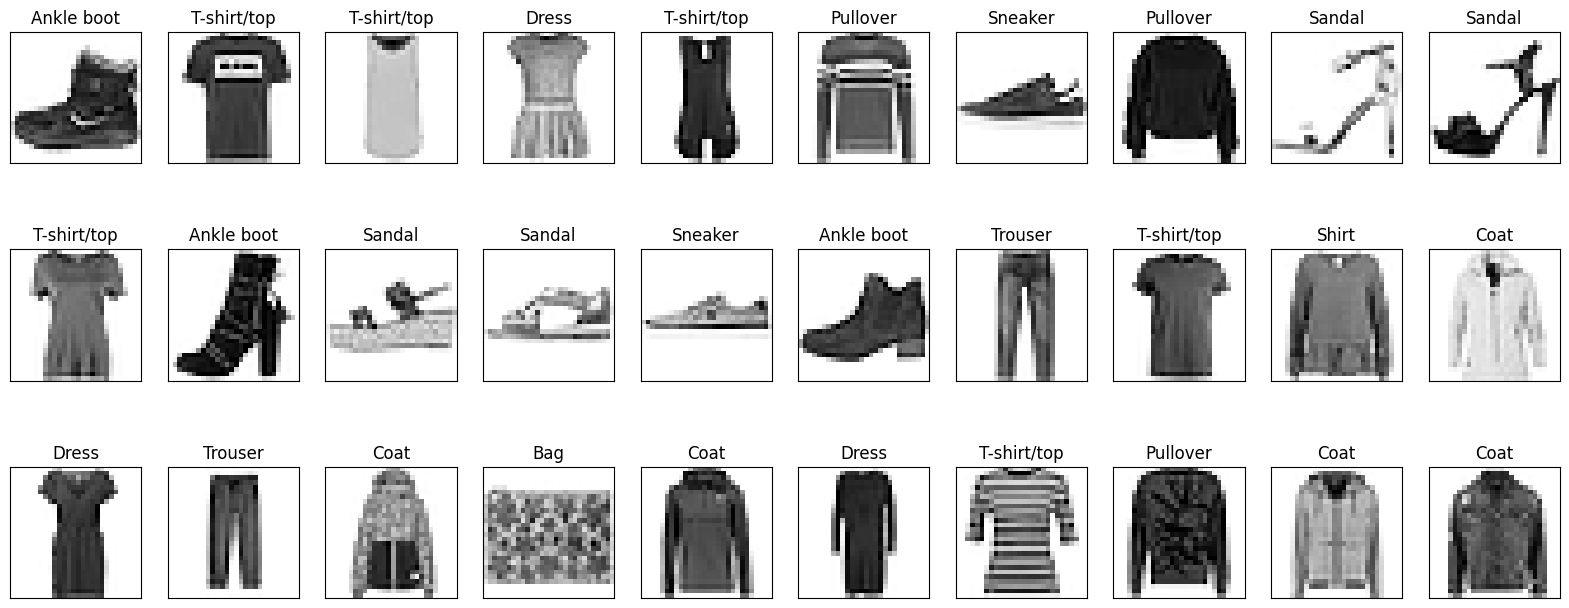

In [3]:
from matplotlib import pyplot as plt
from math import ceil

def show_images(images, labels):
    """Show images in a grid
    """
    n_rows = ceil(len(images) / 10)
    plt.figure(figsize=(20, 8))
    for i, image in enumerate(images):
        ax = plt.subplot(n_rows, 10, i + 1, xticks=[], yticks=[])
        # below we scale the pixel intensities back to display the images correctly
        plt.imshow(image, cmap='Greys')
        plt.title(classes[labels[i]])

show_images(train_images[:30], train_labels[:30])
plt.show();

Transform images with size of 22x22 to array of 784, so it can be used as input of the network

In [4]:
def reshape(images):
    images = images.reshape(images.shape[0], -1)
    return images

train_images = reshape(train_images)
valid_images = reshape(valid_images)
test_images = reshape(test_images)

print(train_images.shape, valid_images.shape, test_images.shape)

(60000, 784) (5000, 784) (5000, 784)


# Model

We set the random seeds to get (as far as possible) reproducible results:

In [5]:
# Fix seeds for (hopefully) reproducible results
from numpy.random import seed
import tensorflow as tf

seed(14)
tf.random.set_seed(19)

## Network

In [8]:
# TODO: Try different models with different number of hidden layer
from keras.models import Sequential
from tensorflow.keras.models import Model
from keras.layers import Dense, Input
from tensorflow.keras.backend import clear_session


tf.compat.v1.reset_default_graph() # Good practice to clear and reset everything
clear_session # using keras

#Model

input = Input(shape=(784,))

hidden = Dense(64, activation="relu")(input)
hidden = Dense(64, activation="relu")(hidden)

#Softmax
predictions = Dense(10, activation='softmax')(hidden)

#Full Model
model = Model(inputs=input, outputs = predictions)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

## Loss, optimization and compilation

In [9]:
from tensorflow.keras.optimizers import Adadelta, Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy

# Loss
loss = sparse_categorical_crossentropy # we use this cross entropy variant as the input is not
                                       # one-hot encoded

# Optimizer
optimizer = Adam() # A "smart" SGD variant

# Compilation
#############
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

## Training

In [10]:
# TODO: Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(valid_images, valid_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7672 - loss: 0.6794 - val_accuracy: 0.8486 - val_loss: 0.4261
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8592 - loss: 0.3895 - val_accuracy: 0.8494 - val_loss: 0.4029
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8752 - loss: 0.3453 - val_accuracy: 0.8664 - val_loss: 0.3705
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8826 - loss: 0.3195 - val_accuracy: 0.8704 - val_loss: 0.3598
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8900 - loss: 0.2991 - val_accuracy: 0.8624 - val_loss: 0.3668
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8944 - loss: 0.2855 - val_accuracy: 0.8722 - val_loss: 0.3572
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9011 - loss: 0.2726 - val_accuracy: 0.8720 - val_loss: 0.3576
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9047 - loss: 0.2621 - 

## Training Performance

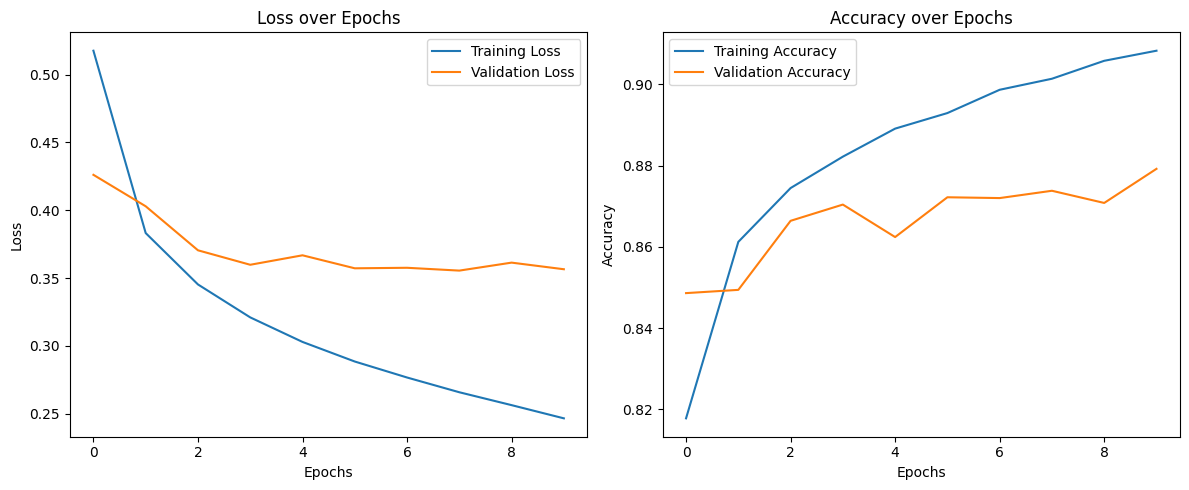

In [11]:
# TODO: Plot loss and accuracy
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

## Quality Check

In [12]:
assert max(history.history['accuracy'])>0.72
assert max(history.history['val_accuracy'])>0.73

## Visualization

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


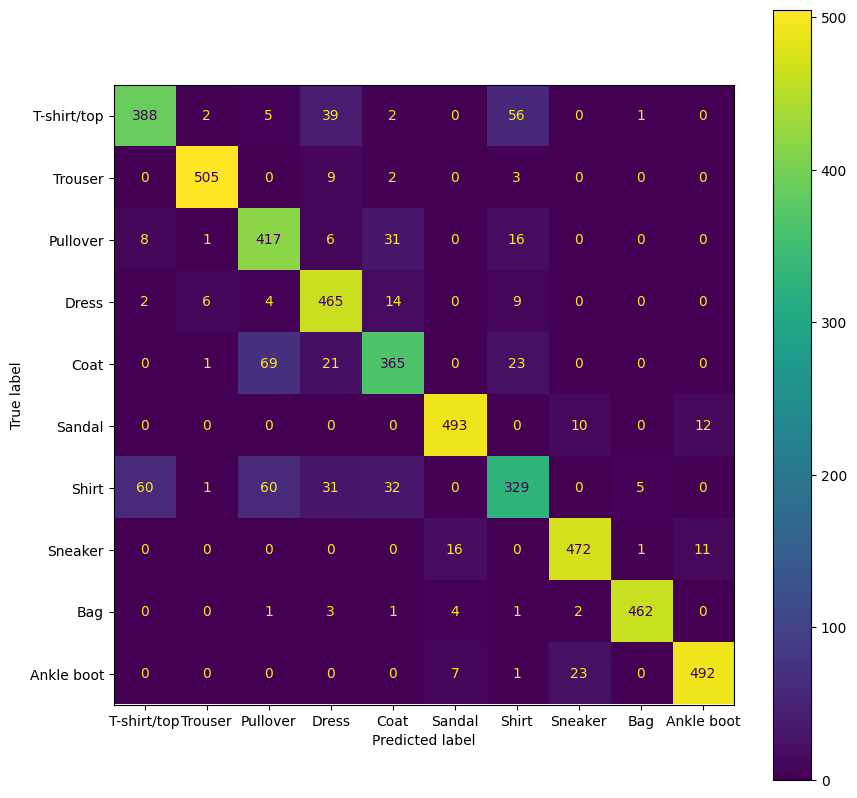

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict
predictions = model.predict(test_images)

# Create confusion matrix and normalizes it over predicted (columns)
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

# Plot
cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
cmd.plot(ax=ax)

In [14]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       493
           1       0.98      0.97      0.98       519
           2       0.75      0.87      0.81       479
           3       0.81      0.93      0.87       500
           4       0.82      0.76      0.79       479
           5       0.95      0.96      0.95       515
           6       0.75      0.64      0.69       518
           7       0.93      0.94      0.94       500
           8       0.99      0.97      0.98       474
           9       0.96      0.94      0.95       523

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



## Saving the model

In [15]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [16]:
model.save('my_model.keras')  # creates a HDF5 file 'my_model.h5'